In [1]:
!pip install yellowbrick

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

In [2]:
#Reading the Dataset
df = pd.read_csv('Dataset-C-TelcoChurn.csv')

In [3]:
#Visualize first 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Get dimension of the DataFrame
df.shape

(7043, 21)

In [5]:
#Print information of the data (eg: indexes , non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Print data types of each columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#Drop unneeded columns
df = df.drop('customerID', axis=1)

In [8]:
#Change data type to numerical for continuous variable
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#Check null counts
df.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Replace null value with 0
df['TotalCharges'].fillna(0, inplace=True)

In [11]:
#Re-verify null counts
df.isnull().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot: ylabel='Churn'>

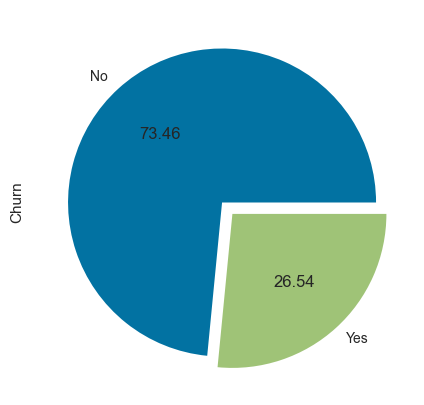

In [15]:
#Visualize the proportions of Churn
plt.figure(figsize = (15,5))
df['Churn'].value_counts().plot(kind = 'pie',autopct = '%.2f', explode = [0,0.1])

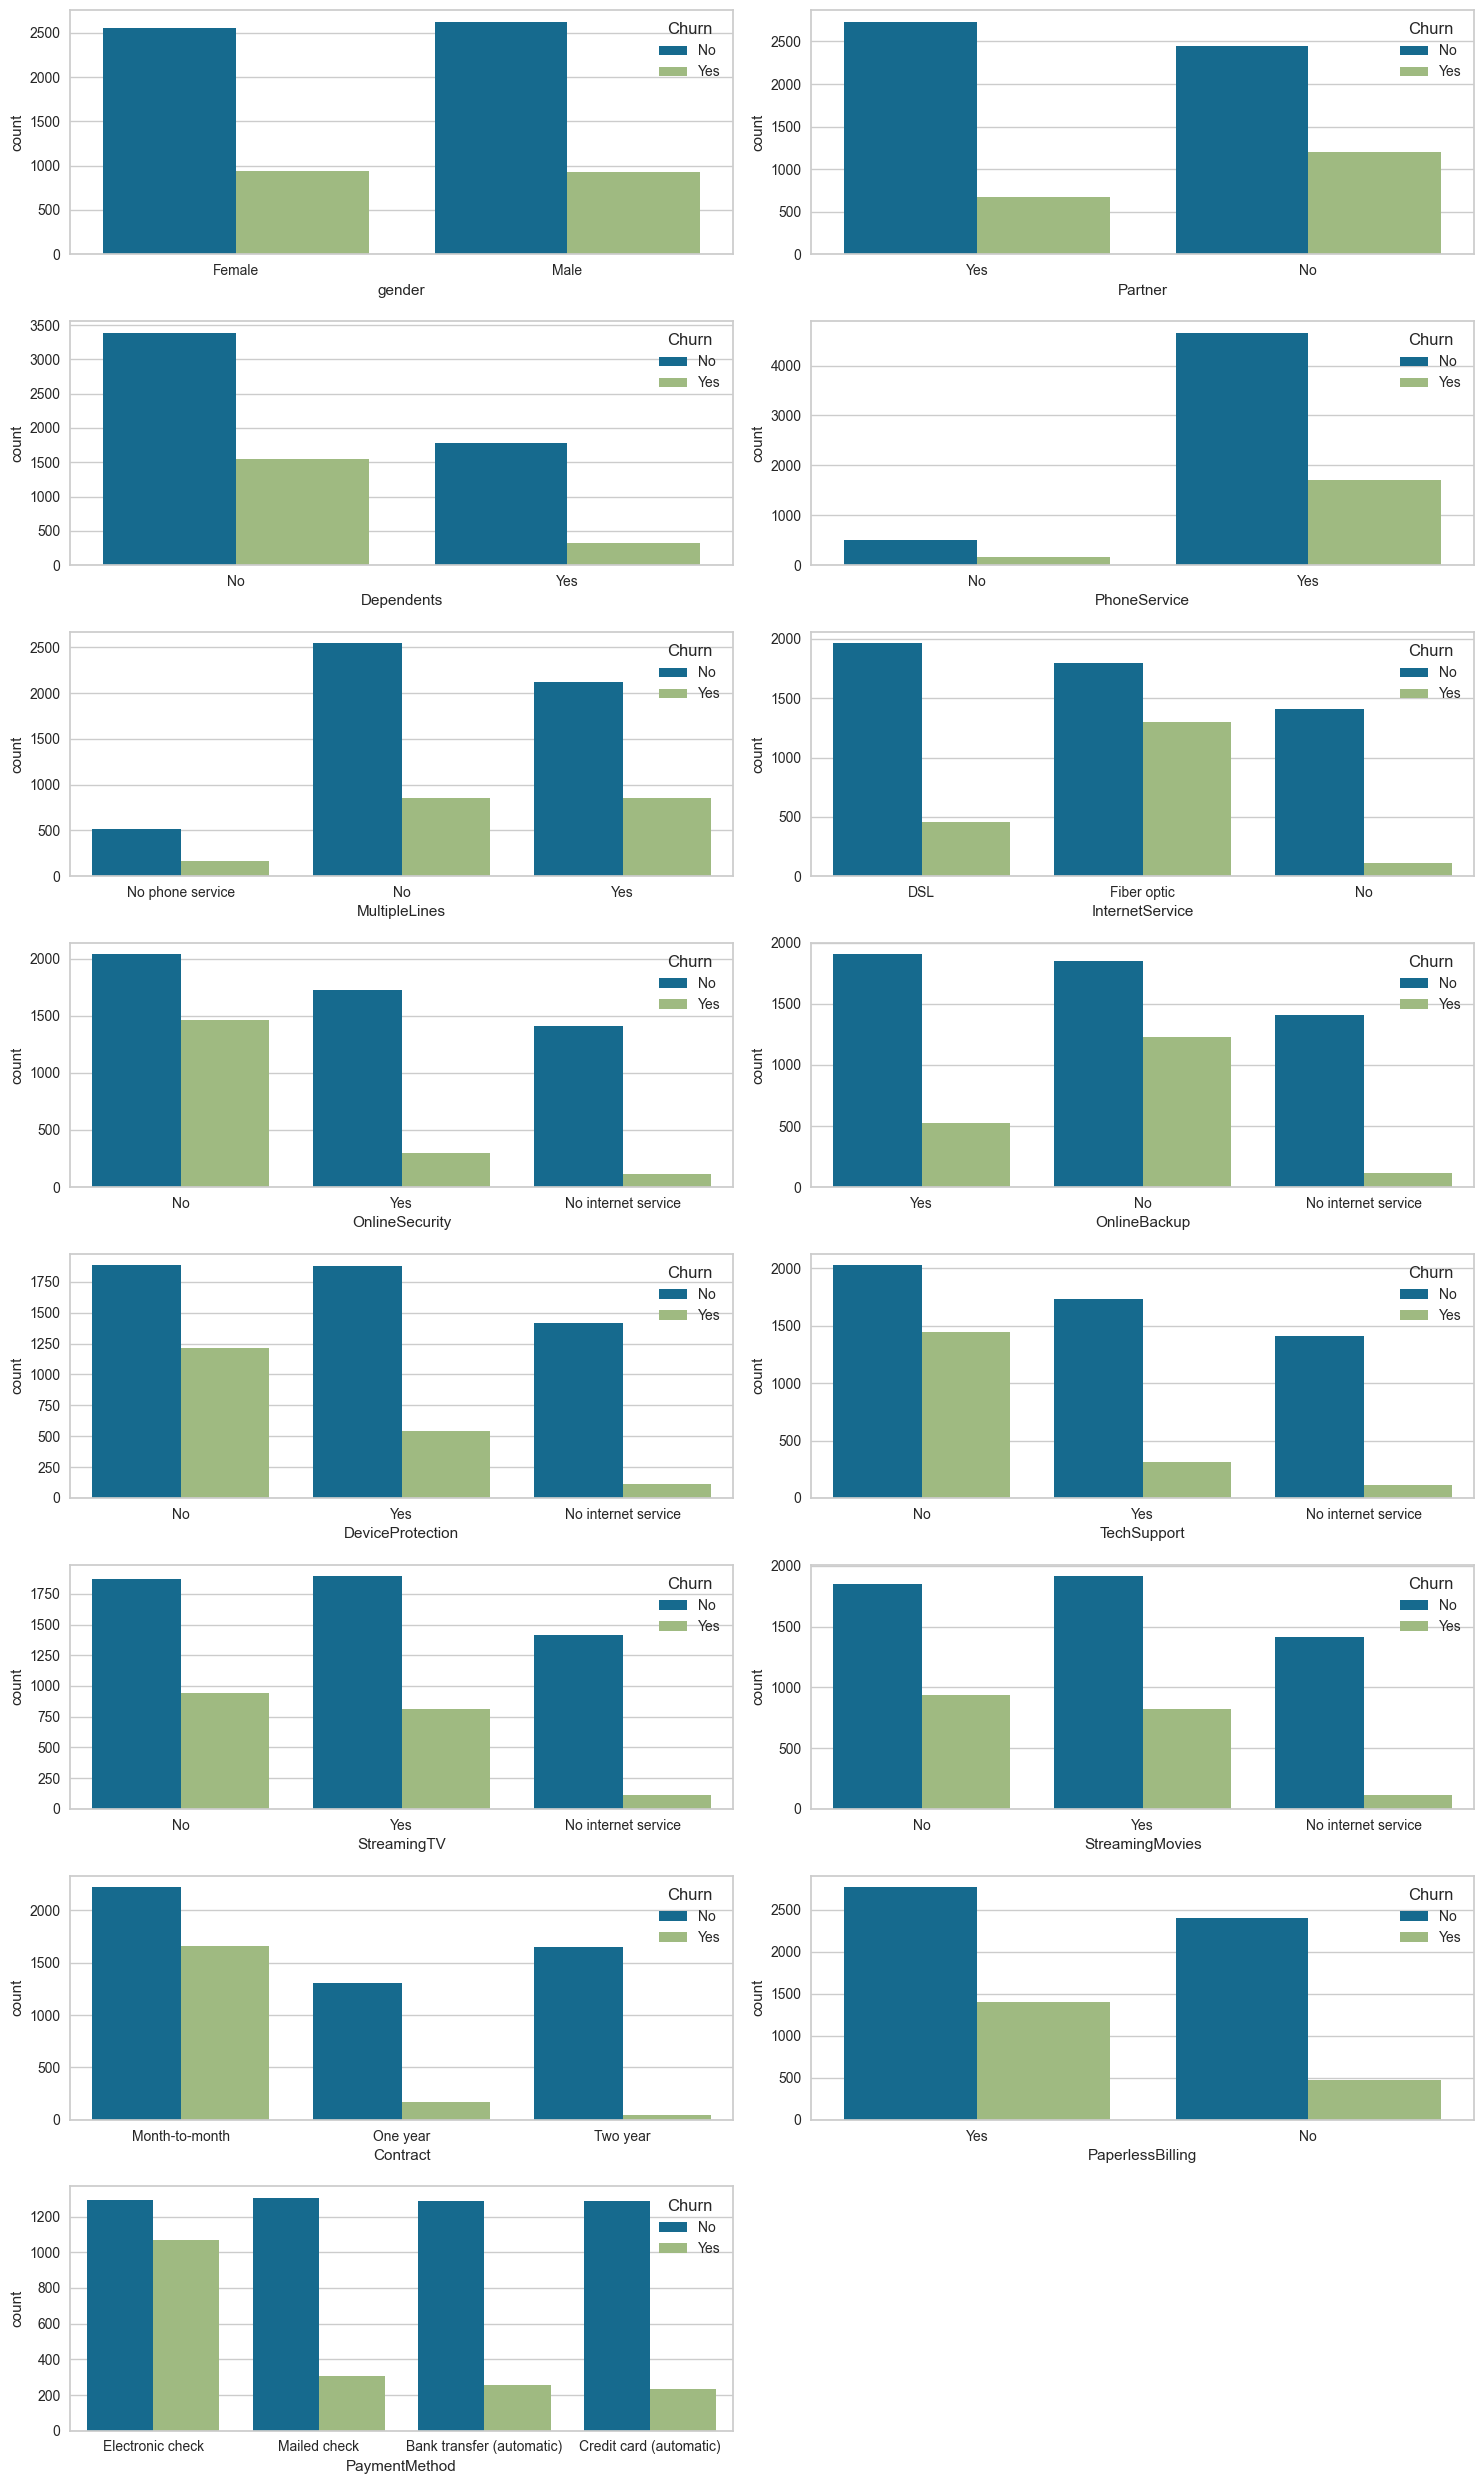

In [17]:
#Visualize the countplots for all categories against Churn
cat_col = df.select_dtypes(include = ['object'])
cat_col.drop(columns = ['Churn'],inplace = True)
j=1 

plt.figure(figsize = (15,25))

for i in cat_col.columns:
    plt.subplot(8,2,j)
    sns.countplot(x = df[i],hue = df['Churn'])
    j+=1

plt.tight_layout()

In [18]:
#Statistical overview of the continuous variables in the dataset
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000000,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7043.000000,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.000000,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.000000,2279.734304,2266.794470,0.000000,398.550000,1394.550000,3786.600000,8684.800000


In [19]:
#Overview of the categorical features in the dataset
df.describe(include=object).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [22]:
#Getting the value counts in gender column
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
#Label encoding the values to indicate binary values
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['gender'].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [24]:
#Getting the value counts in Partner column
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [25]:
#Label encoding the values to indicate binary values
df['Partner'] = df['Partner'].replace('Yes', 1)
df['Partner'] = df['Partner'].replace('No', 0)
df['Partner'].value_counts()

0    3641
1    3402
Name: Partner, dtype: int64

In [26]:
#Getting the value counts in Dependents column
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [27]:
#Label encoding the values to indicate binary values
df['Dependents'] = df['Dependents'].replace('Yes', 1)
df['Dependents'] = df['Dependents'].replace('No', 0)
df['Dependents'].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

In [28]:
#Getting the value counts in Phone Service column
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [29]:
#Label encoding the values to indicate binary values
df['PhoneService'] = df['PhoneService'].replace('Yes', 1)
df['PhoneService'] = df['PhoneService'].replace('No', 0)
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [30]:
#Getting the value counts in Phone Service column
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [31]:
#Label encoding the values to indicate binary values
df['PaperlessBilling'] = df['PaperlessBilling'].replace('Yes', 1)
df['PaperlessBilling'] = df['PaperlessBilling'].replace('No', 0)
df['PaperlessBilling'].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [32]:
#Getting the value counts in Churn column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [33]:
#Label encoding the values to indicate binary values
df['Churn'] = df['Churn'].replace('Yes', 1)
df['Churn'] = df['Churn'].replace('No', 0)
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### For the remaining categorical data, one-hot encoding method is chosen to convert it to a numerical value. 
### Ordinal and label encoding would not be appropriate as it would introduce ranking in the data

In [34]:
#Create a second dataframe and generate the one-hot encoding for all remaining categorical data
df2 = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

In [35]:
#Overview of the one-hot encoded data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

# K-Means (Partition-Based)

### In order to find an appropriate number of clusters, the elbow method will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

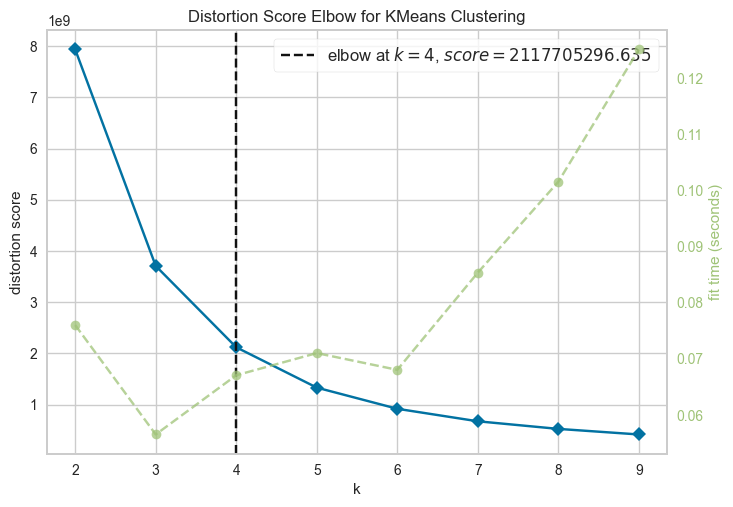

In [36]:
#Visualizing the elbow method
X = df2.values[:,:]
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

### The graph above shows the reduction of a distortion score as the number of clusters increases. However, there is no clear "elbow" visible. The underlying algorithm suggests 4 clusters. A choice of 4 or 5 clusters seems to be fair. Another way to choose the best number of clusters is to plot the silhuette score in a function of number of clusters. Let's see the results.

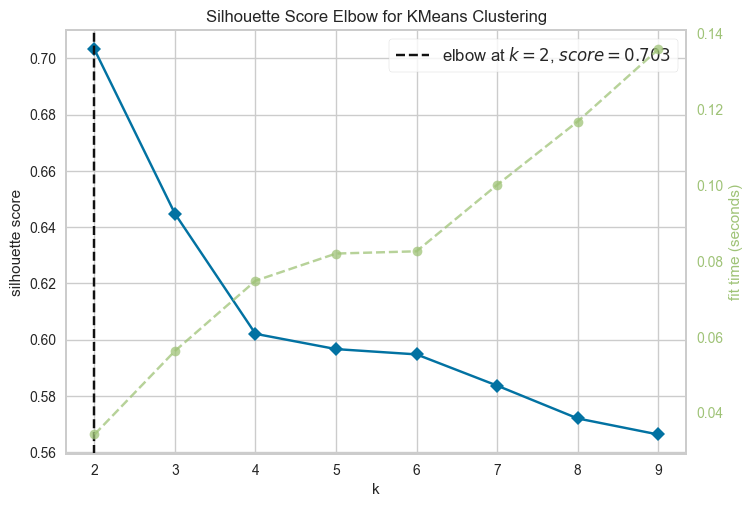

In [37]:
#Implementing silhoutte coefficient in the elbow chart
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [38]:
#Fit the algorithm using 2 clusters as suggested
#Assign the k-means label in the dataframe

KM_clusters = KMeans(n_clusters=2, init='k-means++').fit(X) 
labels = KM_clusters.labels_
df2['KM_Clus'] = labels

In [39]:
#Create a new dataframe to get the relationship between the K-mean labels and mean of the data
df3 = df2.groupby('KM_Clus').mean()
df3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
KM_Clus,,,,,,,,,,,,,,,,,,,,,
0,0.499522,0.212237,0.684034,0.335086,58.940249,0.954589,0.701243,91.196702,5361.063360,0.153920,...,0.272467,0.000000,0.727533,0.261472,0.304971,0.433556,0.317878,0.309273,0.299713,0.073136
1,0.506968,0.140982,0.398101,0.284589,21.144617,0.881438,0.546152,53.591820,977.746748,0.312462,...,0.447384,0.308221,0.244395,0.672187,0.168653,0.159160,0.177540,0.176732,0.351040,0.294688


C:\Users\dines\AppData\Local\Temp\ipykernel_27340\1686570432.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(df2.iloc[:, 4], df2.iloc[:, 7], c=labels.astype(np.float), alpha=0.5, cmap='viridis')


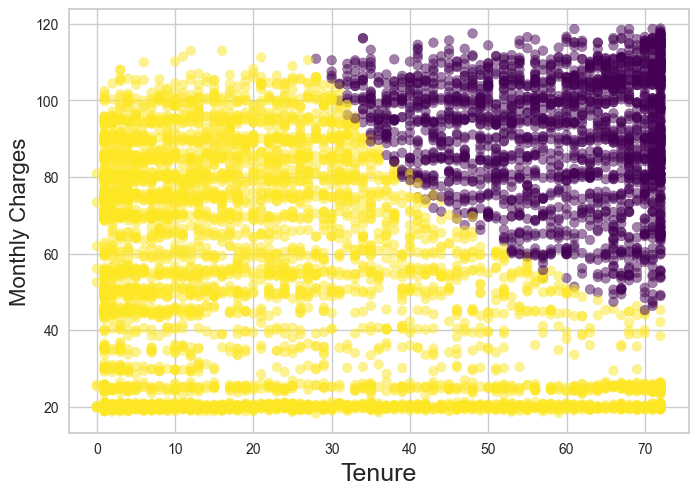

In [42]:
#Visualizing the clusters in Tenure vs Monthly Charges
plt.scatter(df2.iloc[:, 4], df2.iloc[:, 7], c=labels.astype(np.float), alpha=0.5, cmap='viridis')
plt.xlabel('Tenure', fontsize=18)
plt.ylabel('Monthly Charges', fontsize=16)

plt.show()

In [44]:
#Visualizing 3d plot of Tenure, Monthly Charges and Churn
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['KM_Clus']==n]['tenure'],
        y = db[db['KM_Clus']==n]['MonthlyCharges'],
        z = db[db['KM_Clus']==n]['Churn'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(df2, 0, 'Cluster 0')
trace1 = tracer(df2, 1, 'Cluster 1')
trace2 = tracer(df2, 2, 'Cluster 2')
trace3 = tracer(df2, 3, 'Cluster 3')
trace4 = tracer(df2, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Tenure'),
            yaxis = dict(title = 'Monthly Charges'),
            zaxis = dict(title = 'Churn')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

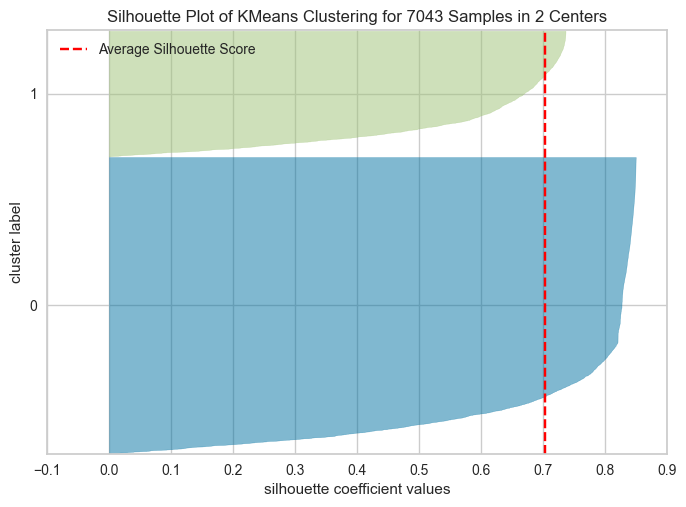

In [46]:
#Check the quality of each cluster

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()
plt.show()

# DBSCAN (Density-Based)

### It is difficult arbitrarily to say what values of epsilon and min_samples will work the best. Therefore, first a matrix of investigated combinations shall be created.

In [47]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

### Because DBSCAN creates clusters itself based on those two parameters let's check the number of generated clusters.

In [48]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

### A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.

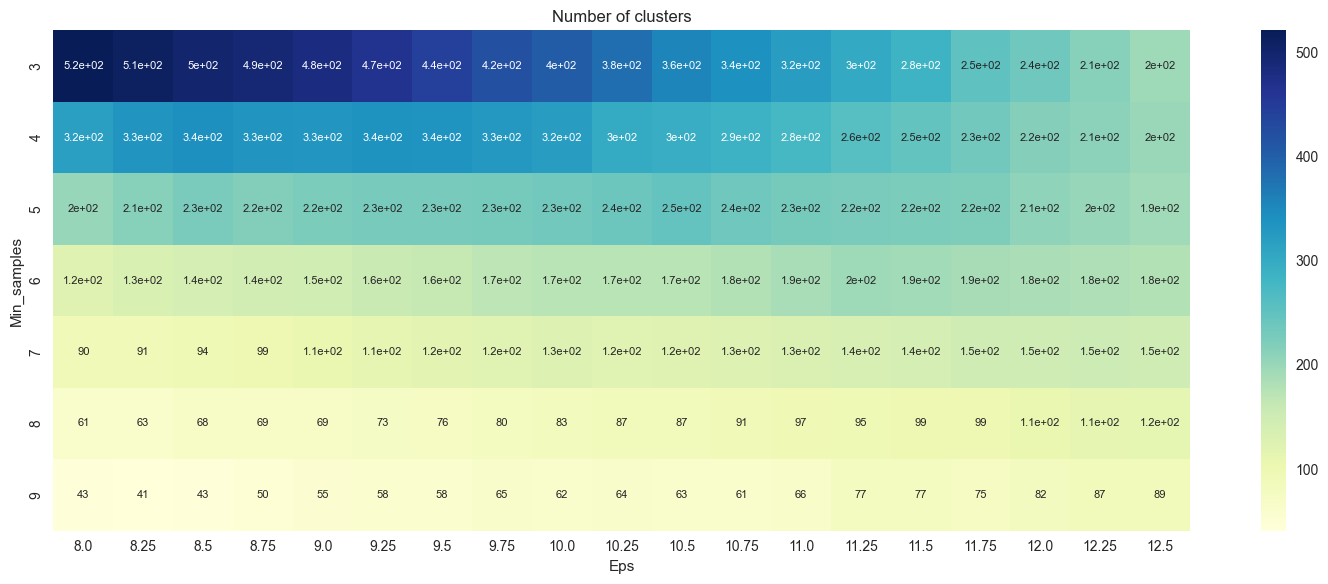

In [49]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 8}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.tight_layout()
plt.show()

### The heatplot above shows, the number of clusters varies greatly. To decide which combination to choose, a metric - a silhuette score will be plotted as a heatmap again.

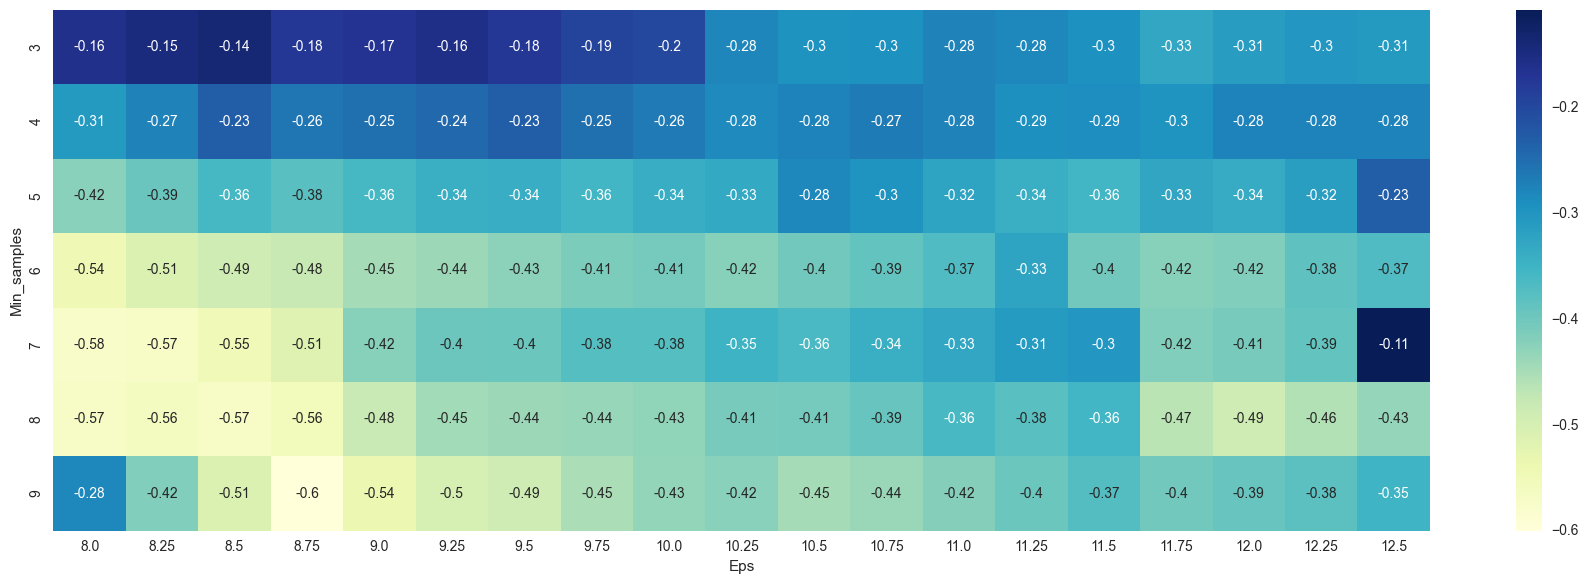

In [50]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.tight_layout()
plt.show()

### Values are in negative, indicating something is wrong with the data or the algorithm. To check whether is there something wrong with the data, the model are trained again using only continuous variables. All binary data and one-hot encoded data are omitted. The above processes for DBSCAN are repeated.

In [51]:
df4 = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
X = df4.values[:,:]

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

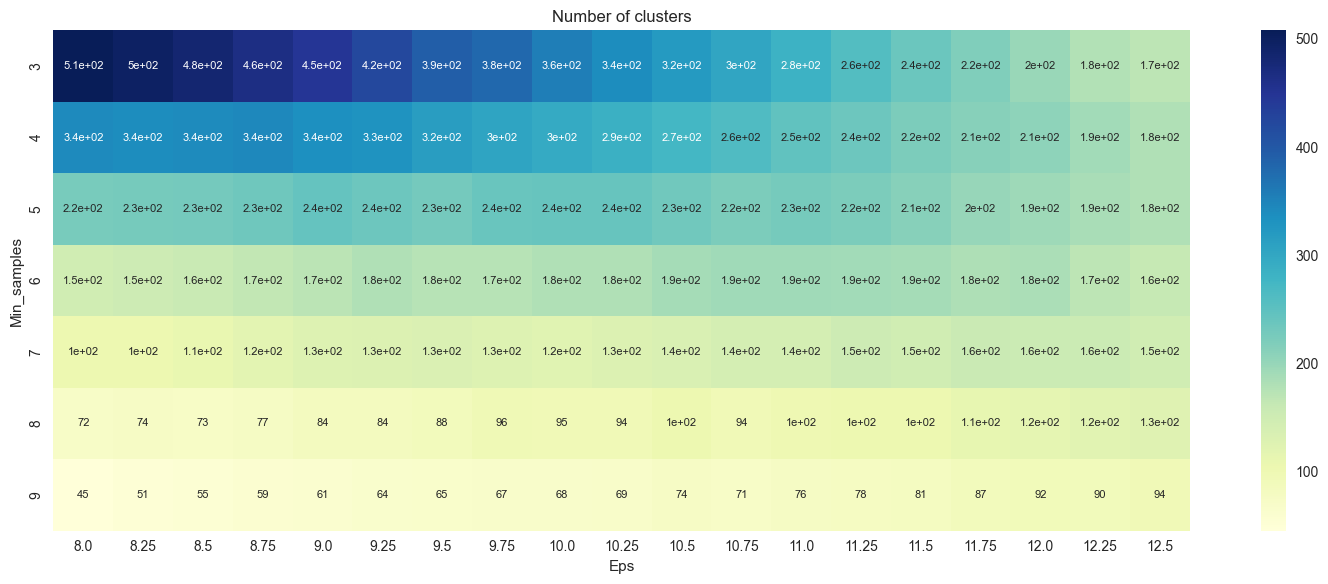

In [52]:
#Visualize the number of clusters for the updated criterias
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 8}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.tight_layout()
plt.show()

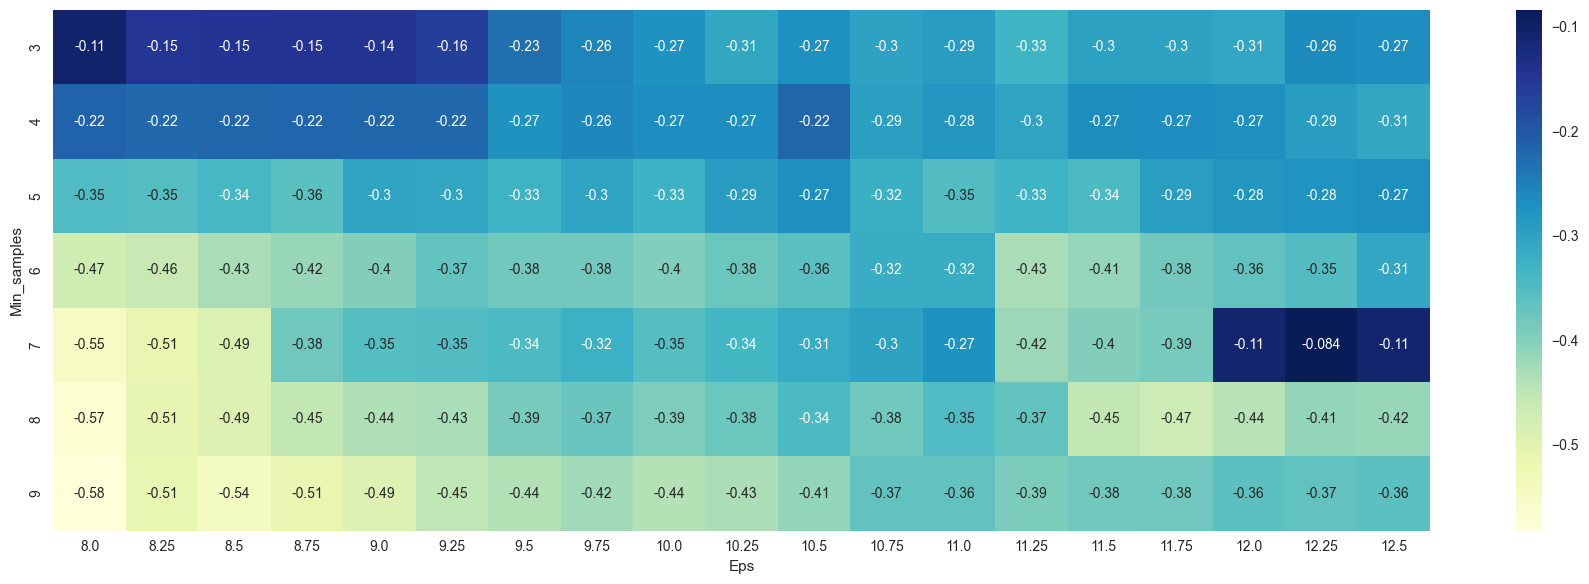

In [53]:
#Visualize the heatmap of silhuette scores for the updated criteria
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.tight_layout()
plt.show()

### The negative values of the updated silhuette scores are indicative that the dataset is not suitable for DBSCAN as no apparent number of clusters can be generated. To visualize this, a scatterplot of Tenure vs Monthly Charges shall show that there are no apparent clusters that can be derived using density-based cluster methods unlike partition-based clustering methods where number of clusters are specified by the user 

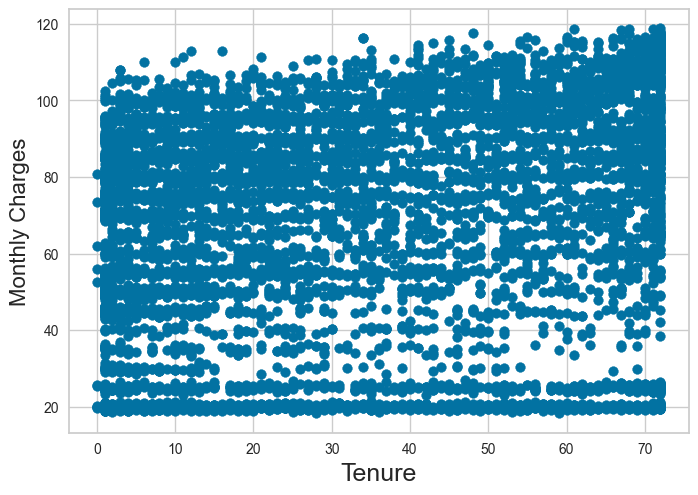

In [57]:
#Scatterplot of Tenure vs Monthly Charges

plt.scatter(df4['tenure'], df4['MonthlyCharges'])
plt.xlabel('Tenure', fontsize=18)
plt.ylabel('Monthly Charges', fontsize=16)
plt.show()